In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#Loading Data

In [2]:
cancer = pd.read_csv('cancer.csv')

In [3]:
cancer.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,2
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,2
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,2
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,2


In [4]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      569 non-null    float64
 1   V2      569 non-null    float64
 2   V3      569 non-null    float64
 3   V4      569 non-null    float64
 4   V5      569 non-null    float64
 5   V6      569 non-null    float64
 6   V7      569 non-null    float64
 7   V8      569 non-null    float64
 8   V9      569 non-null    float64
 9   V10     569 non-null    float64
 10  V11     569 non-null    float64
 11  V12     569 non-null    float64
 12  V13     569 non-null    float64
 13  V14     569 non-null    float64
 14  V15     569 non-null    float64
 15  V16     569 non-null    float64
 16  V17     569 non-null    float64
 17  V18     569 non-null    float64
 18  V19     569 non-null    float64
 19  V20     569 non-null    float64
 20  V21     569 non-null    float64
 21  V22     569 non-null    float64
 22  V2

In [5]:
cancer['Class'].value_counts()

1    357
2    212
Name: Class, dtype: int64

In [6]:
X = cancer.drop(['Class'],axis=1)

In [7]:
y = cancer['Class']

#Train And Test Splitting

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(455, 30) (114, 30) (455,) (114,)


#Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)


LogisticRegression()

In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

y_train_pred = logreg.predict(X_train)

print("Metrics on Train samples")
print("============================================================== ")
print("confusion_matrix: \n",confusion_matrix(y_train,y_train_pred))
print("classification_report: \n",classification_report(y_train,y_train_pred))
print("============================================================== ")

y_test_pred = logreg.predict(X_test)

print("Metrics on Test samples ")
print("============================================================== ")
print("confusion_matrix: \n",confusion_matrix(y_test,y_test_pred))
print("classification_report: \n",classification_report(y_test,y_test_pred))
print("============================================================== ")

Metrics on Train samples
confusion_matrix: 
 [[278   8]
 [ 15 154]]
classification_report: 
               precision    recall  f1-score   support

           1       0.95      0.97      0.96       286
           2       0.95      0.91      0.93       169

    accuracy                           0.95       455
   macro avg       0.95      0.94      0.95       455
weighted avg       0.95      0.95      0.95       455

Metrics on Test samples 
confusion_matrix: 
 [[70  1]
 [ 3 40]]
classification_report: 
               precision    recall  f1-score   support

           1       0.96      0.99      0.97        71
           2       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Text(0.5, 257.44, 'Predicted label')

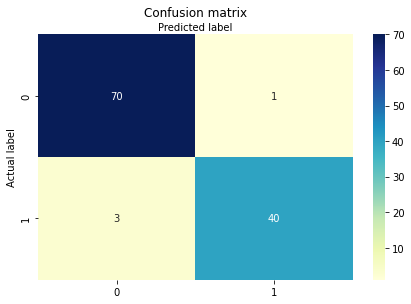

In [13]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

y_pred = logreg.predict(X_test)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [14]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9649122807017544
Precision: 0.958904109589041
Recall: 0.9859154929577465


#Logistic Regression with PCA

In [18]:
# Applying Kernel PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

In [19]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report

y_train_pred = classifier.predict(X_train)

print("Metrics on Train samples")
print("============================================================== ")
print("confusion_matrix: \n",confusion_matrix(y_train,y_train_pred))
print("classification_report: \n",classification_report(y_train,y_train_pred))
print("============================================================== ")

y_test_pred = classifier.predict(X_test)

print("Metrics on Test samples ")
print("============================================================== ")
print("confusion_matrix: \n",confusion_matrix(y_test,y_test_pred))
print("classification_report: \n",classification_report(y_test,y_test_pred))
print("============================================================== ")

Metrics on Train samples
confusion_matrix: 
 [[286   0]
 [169   0]]
classification_report: 
               precision    recall  f1-score   support

           1       0.63      1.00      0.77       286
           2       0.00      0.00      0.00       169

    accuracy                           0.63       455
   macro avg       0.31      0.50      0.39       455
weighted avg       0.40      0.63      0.49       455

Metrics on Test samples 
confusion_matrix: 
 [[71  0]
 [43  0]]
classification_report: 
               precision    recall  f1-score   support

           1       0.62      1.00      0.77        71
           2       0.00      0.00      0.00        43

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114



#Logistic Regression with LDA

In [21]:
# Applying LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [22]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report

y_train_pred = classifier.predict(X_train)

print("Metrics on Train samples")
print("============================================================== ")
print("confusion_matrix: \n",confusion_matrix(y_train,y_train_pred))
print("classification_report: \n",classification_report(y_train,y_train_pred))
print("============================================================== ")

y_test_pred = classifier.predict(X_test)

print("Metrics on Test samples ")
print("============================================================== ")
print("confusion_matrix: \n",confusion_matrix(y_test,y_test_pred))
print("classification_report: \n",classification_report(y_test,y_test_pred))
print("============================================================== ")

Metrics on Train samples
confusion_matrix: 
 [[286   0]
 [169   0]]
classification_report: 
               precision    recall  f1-score   support

           1       0.63      1.00      0.77       286
           2       0.00      0.00      0.00       169

    accuracy                           0.63       455
   macro avg       0.31      0.50      0.39       455
weighted avg       0.40      0.63      0.49       455

Metrics on Test samples 
confusion_matrix: 
 [[71  0]
 [43  0]]
classification_report: 
               precision    recall  f1-score   support

           1       0.62      1.00      0.77        71
           2       0.00      0.00      0.00        43

    accuracy                           0.62       114
   macro avg       0.31      0.50      0.38       114
weighted avg       0.39      0.62      0.48       114

